# Part 1 - Data Setup

This notebook is to import the images and data and have a simple look at what I'm working with.

### References
* https://www.kaggle.com/thomasjpfan/q-a-with-only-pictures
* https://www.kaggle.com/c/rsna-pneumonia-detection-challenge#evaluation
* https://github.com/dov/dcmpandas/blob/master/dcmpandas.py

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import pydicom

import os

warnings.filterwarnings('ignore')

In [2]:
#Setup path locations
BASE_PATH = 'G:\Kaggle\RSNA_Comp'
TRAIN_PATH_RAW = 'G:\Kaggle\RSNA_Comp\stage_1_train_images'
TEST_PATH_RAW = 'G:\Kaggle\RSNA_Comp\stage_1_test_images'

In [3]:
sample_sub = pd.read_csv(os.path.join(BASE_PATH, 'stage_1_sample_submission.csv'))
train_labels = pd.read_csv(os.path.join(BASE_PATH, 'stage_1_train_labels.csv'))
X_info = pd.read_csv(os.path.join(BASE_PATH, 'stage_1_detailed_class_info.csv'))

In [4]:
sample_sub.head(10)

,patientId,PredictionString
0,000924cf-0f8d-42bd-9158-1af53881a557,0.5 0 0 100 100
1,000db696-cf54-4385-b10b-6b16fbb3f985,0.5 0 0 100 100
2,000fe35a-2649-43d4-b027-e67796d412e0,0.5 0 0 100 100
3,001031d9-f904-4a23-b3e5-2c088acd19c6,0.5 0 0 100 100
4,0010f549-b242-4e94-87a8-57d79de215fc,0.5 0 0 100 100
5,001916b8-3d30-4935-a5d1-8eaddb1646cd,0.5 0 0 100 100
6,0022073f-cec8-42ec-ab5f-bc2314649235,0.5 0 0 100 100
7,0022995a-45eb-4cfa-9a59-cd15f5196c64,0.5 0 0 100 100
8,0025d2de-bd78-4d36-9f72-e15a5e22ca82,0.5 0 0 100 100
9,00293de0-a530-41dc-9621-0b3def01d06d,0.5 0 0 100 100


Submission encoding = Confidence | x | y | width | height

In [5]:
train_labels.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [6]:
X_info.head(10)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [7]:
train_labels.nunique()

patientId    25684
x              738
y              722
width          346
height         722
Target           2
dtype: int64

In [8]:
X_info.nunique()

patientId    25684
class            3
dtype: int64

In [9]:
sample_sub.nunique()

patientId           1000
PredictionString       1
dtype: int64

So overall there's 25k in the training set and 1k in the test set.  Data generation/augmentation may be needed therefore as the sample set is quite small.

The info is more detailed training labels which can be used for multi-class labelling but may not be necessary.

In [10]:
#Import dicoms
zero_test = pydicom.read_file(os.path.join(TRAIN_PATH_RAW, '003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm'))
one_test = pydicom.read_file(os.path.join(TRAIN_PATH_RAW, '00704310-78a8-4b38-8475-49f4573b2dbb.dcm'))

#Set images 
zero_img = zero_test.pixel_array
one_img = one_test.pixel_array

#Get bounding boxes for positive example
boxes = train_labels.loc[train_labels.patientId == '00704310-78a8-4b38-8475-49f4573b2dbb', 
                       ['x', 'y', 'width', 'height']]

In [11]:
zero_test

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.2293.1517874295.733882
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '003d8fa0-6bf1-40ed-b54c-ac657f8495c5'
(0010, 0020) Patient ID                          LO: '003d8fa0-6bf1-40ed-b54c-ac657f8495c5'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's

In [24]:
zero_img.shape

(1024, 1024)

In [26]:
one_img.shape

(1024, 1024)

So a LOT more tertiary data is also included.  Can probably use these with a DT ensemble to generate 0/1 labelling without any image processing needed.  

Can also use learned representation on this ensemble to boost results.

Images also appear to be greyscale 1024x1024 images, therefore no colour channel processing needed.

View position possibly correlated to image orientation.

In [33]:
boxes

,x,y,width,height
8,323.0,577.0,160.0,104.0
9,695.0,575.0,162.0,137.0


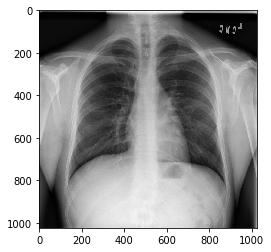

In [62]:
plt.imshow(zero_img, cmap='gray', interpolation='nearest')

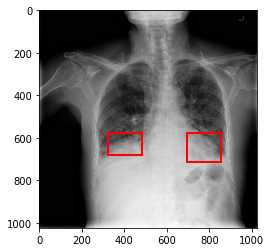

In [61]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(one_img, cmap='gray')

for box in boxes.itertuples():
    rect = patches.Rectangle((box.x, box.y), box.width, box.height,
            linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    
plt.show()   


# Reading in DICOM data

So the first task is to read in all the dcm files metadata into one place to have a master dataset, excluding all of the image data.  

This will allow for a bit more extensive EDA to be done which should help figure out ideas for a solution.

First thing to note is that we have duplicates in the detailed classes due to some images having multiple bounding boxes, so let's dedup and use that as a base table to merge all the other data onto.

In [12]:
X_info.shape

(28989, 2)

In [13]:
X_info.nunique()

patientId    25684
class            3
dtype: int64

In [14]:
X_info.head(10)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [15]:
X_dedup = X_info.drop_duplicates()

In [16]:
X_dedup.shape

(25684, 2)

Next let's convert the dcm files to a dictionary which we can then use to populate a dataframe.

In [17]:
#Read dicom header information to python dictionary
def dicom_to_dict(path, dcm_name):
    dcm_file = pydicom.read_file(os.path.join(path, dcm_name))
    out_dict = {}
    for k in dcm_file.keys():
        #Exclude image data
        if k.group !=  32736:
            #Credit to Dov Grobgeld for the name cleansing code
            field_name = str(dcm_file[k].name.replace(' ','')
                           .replace('\'','')
                           .replace('/','')
                           .replace('[','')
                           .replace(']','')
                           .replace('(','')
                           .replace(')',''))
            out_dict[field_name] = dcm_file[k].value
            
    return out_dict

Now let's put these dictionaries into a master dataframe.

In [27]:
def import_header_info(input_df, path) : 
    for index, row in input_df.iterrows() :
        #Read in file
        dcm_file = row['patientId'] + '.dcm'
        file_dict = dicom_to_dict(path, dcm_file)

        #Convert to panda DataFrame
        file_df = pd.DataFrame(data=file_dict)
        file_df = file_df.drop_duplicates()
        
        #If first read in then keep this as master dataframe
        if index == 0 :
            out_df = file_df.copy()
        #Otherwise append to master dataframe
        else :
            out_df = out_df.append(file_df, ignore_index=True)
            if index % 1000 == 0 :
                print('Loaded file : ', index)
    
    return out_df

In [28]:
X_dedup = X_info.drop_duplicates()
test_input = X_dedup.head(10)

In [29]:
out_test = import_header_info(test_input, TRAIN_PATH_RAW)

In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(out_test)


,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysiciansName,SeriesDescription,PatientsName,PatientID,PatientsBirthDate,PatientsSex,PatientsAge,BodyPartExamined,ViewPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,SeriesNumber,InstanceNumber,PatientOrientation,SamplesperPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.28530.15178744...,19010101,000000.00,,CR,WSD,,view: PA,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0004cfab-14fd-4e49-80ba-63a80b6bddd6,,F,51,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,,1,1,,1,MONOCHROME2,1024,1024,0.143000,8,8,7,0,01,ISO_10918_1
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.26024.15178744...,19010101,000000.00,,CR,WSD,,view: PA,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,,F,48,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.26024.15178744...,1.2.276.0.7230010.3.1.3.8323329.26024.15178744...,,1,1,,1,MONOCHROME2,1024,1024,0.194311,8,8,7,0,01,ISO_10918_1
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.11252.15178743...,19010101,000000.00,,CR,WSD,,view: AP,00322d4d-1c29-4943-afc9-b6754be640eb,00322d4d-1c29-4943-afc9-b6754be640eb,,M,19,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.11252.15178743...,1.2.276.0.7230010.3.1.3.8323329.11252.15178743...,,1,1,,1,MONOCHROME2,1024,1024,0.168000,8,8,7,0,01,ISO_10918_1
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.2293.151787429...,19010101,000000.00,,CR,WSD,,view: PA,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,,M,28,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.2293.151787429...,1.2.276.0.7230010.3.1.3.8323329.2293.151787429...,,1,1,,1,MONOCHROME2,1024,1024,0.143000,8,8,7,0,01,ISO_10918_1
4,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.6379.151787432...,19010101,000000.00,,CR,WSD,,view: AP,00436515-870c-4b36-a041-de91049b9ab4,00436515-870c-4b36-a041-de91049b9ab4,,F,32,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.6379.151787432...,1.2.276.0.7230010.3.1.3.8323329.6379.151787432...,,1,1,,1,MONOCHROME2,1024,1024,0.139000,8,8,7,0,01,ISO_10918_1
5,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.18028.15178744...,19010101,000000.00,,CR,WSD,,view: AP,00569f44-917d-4c86-a842-81832af98c30,00569f44-917d-4c86-a842-81832af98c30,,M,54,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.18028.15178744...,1.2.276.0.7230010.3.1.3.8323329.18028.15178744...,,1,1,,1,MONOCHROME2,1024,1024,0.139000,8,8,7,0,01,ISO_10918_1
6,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.27915.15178744...,19010101,000000.00,,CR,WSD,,view: PA,006cec2e-6ce2-4549-bffa-eadfcd1e9970,006cec2e-6ce2-4549-bffa-eadfcd1e9970,,M,78,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.27915.15178744...,1.2.276.0.7230010.3.1.3.8323329.27915.15178744...,,1,1,,1,MONOCHROME2,1024,1024,0.143000,8,8,7,0,01,ISO_10918_1
7,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.4188.151787430...,19010101,000000.00,,CR,WSD,,view: PA,00704310-78a8-4b38-8475-49f4573b2dbb,00704310-78a8-4b38-8475-49f4573b2dbb,,M,75,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.4188.151787430...,1.2.276.0.7230010.3.1.3.8323329.4188.151787430...,,1,1,,1,MONOCHROME2,1024,1024,0.143000,8,8,7,0,01,ISO_10918_1
8,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.17654.15178744...,19010101,000000.00,,CR,WSD,,view: PA,008c19e8-a820-403a-930a-bc74a4053664,008c19e8-a820-403a-930a-bc74a4053664,,F,59,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.17654.15178744...,1.2.276.0.7230010.3.1.3.8323329.17654.15178744...,,1,1,,1,MONOCHROME2,1024,1024,0.194311,8,8,7,0,01,ISO_10918_1
9,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.5513.151787431...,19010101,00

This seems to have worked perfectly, so let's read in the full training data and merge on the target data.

In [31]:
#First get the target data and only keep binary classes and dedup
targets = train_labels.copy()
targets = targets.drop(['x', 'y', 'width', 'height'], axis=1)
targets = targets.drop_duplicates()

In [32]:
#Next merge target data with class data
Train_full = pd.merge(X_dedup, targets, on='patientId', how='left')

In [33]:
Train_full.head(10)

,patientId,class,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1
5,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,0
6,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,0
7,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,1
8,008c19e8-a820-403a-930a-bc74a4053664,No Lung Opacity / Not Normal,0
9,009482dc-3db5-48d4-8580-5c89c4f01334,Normal,0


Looking at this data it seems that the class 'Lung Opacity' is the target we need to classify.

Now to extract and merge all of the patient data.

In [34]:
Train_full.shape

(25684, 3)

In [35]:
header_full = import_header_info(Train_full, TRAIN_PATH_RAW)

Loaded file :  1000
Loaded file :  2000
Loaded file :  3000
Loaded file :  4000
Loaded file :  5000
Loaded file :  6000
Loaded file :  7000
Loaded file :  8000
Loaded file :  9000
Loaded file :  10000
Loaded file :  11000
Loaded file :  12000
Loaded file :  13000
Loaded file :  14000
Loaded file :  15000
Loaded file :  16000
Loaded file :  17000
Loaded file :  18000
Loaded file :  19000
Loaded file :  20000
Loaded file :  21000
Loaded file :  22000
Loaded file :  23000
Loaded file :  24000
Loaded file :  25000


In [40]:
Train_full = pd.merge(Train_full, header_full, left_on='patientId', right_on='PatientID' , how='left')

In [45]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(Train_full.head(5))

,patientId,class,Target,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysiciansName,SeriesDescription,PatientsName,PatientID,PatientsBirthDate,PatientsSex,PatientsAge,BodyPartExamined,ViewPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,SeriesNumber,InstanceNumber,PatientOrientation,SamplesperPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.28530.15178744...,19010101,000000.00,,CR,WSD,,view: PA,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0004cfab-14fd-4e49-80ba-63a80b6bddd6,,F,51,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,,1,1,,1,MONOCHROME2,1024,1024,0.143000,8,8,7,0,01,ISO_10918_1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.26024.15178744...,19010101,000000.00,,CR,WSD,,view: PA,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,,F,48,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.26024.15178744...,1.2.276.0.7230010.3.1.3.8323329.26024.15178744...,,1,1,,1,MONOCHROME2,1024,1024,0.194311,8,8,7,0,01,ISO_10918_1
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.11252.15178743...,19010101,000000.00,,CR,WSD,,view: AP,00322d4d-1c29-4943-afc9-b6754be640eb,00322d4d-1c29-4943-afc9-b6754be640eb,,M,19,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.11252.15178743...,1.2.276.0.7230010.3.1.3.8323329.11252.15178743...,,1,1,,1,MONOCHROME2,1024,1024,0.168000,8,8,7,0,01,ISO_10918_1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.2293.151787429...,19010101,000000.00,,CR,WSD,,view: PA,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,,M,28,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.2293.151787429...,1.2.276.0.7230010.3.1.3.8323329.2293.151787429...,,1,1,,1,MONOCHROME2,1024,1024,0.143000,8,8,7,0,01,ISO_10918_1
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.6379.151787432...,19010101,000000.00,,CR,WSD,,view: AP,00436515-870c-4b36-a041-de91049b9ab4,00436515-870c-4b36-a041-de91049b9ab4,,F,32,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.6379.151787432...,1.2.276.0.7230010.3.1.3.8323329.6379.151787432...,,1,1,,1,MONOCHROME2,1024,1024,0.139000,8,8,7,0,01,ISO_10918_1


In [46]:
#Dropping duplicate columns
Train_full = Train_full.drop(['PatientsName','PatientID' ], axis=1)

Now to save the dataset to disk for future EDA.

First optimize the variable storage.

In [48]:
# Credit to Guillaume Martin for the Memory Optimizer
# https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else: df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [49]:
Train_full = reduce_mem_usage(Train_full)

Memory usage of dataframe is 7.05 MB
Memory usage after optimization is: 5.24 MB
Decreased by 25.7%


Now save to disk.

In [69]:
TRAIN_PATH_CLEAN = 'G:\Kaggle\RSNA_Comp\\train_image_clean'

In [71]:
#Save as simple csv format as its a small file
Train_full.to_csv(os.path.join(TRAIN_PATH_CLEAN, 'train_full.csv'), index=True)

## Submission Data

Now to do the same steps for submission data as this will be needed for EDA to compare variable distributions.

In [72]:
TEST_PATH_CLEAN = 'G:\Kaggle\RSNA_Comp\\test_image_clean'

In [76]:
test_full = sample_sub.copy()
test_full = test_full.drop('PredictionString', axis=1)

In [78]:
header_test = import_header_info(test_full, TEST_PATH_RAW)

In [80]:
header_test.head(5)

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysiciansName,SeriesDescription,...,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.20023.15178744...,19010101,000000.00,,CR,WSD,,view: AP,...,MONOCHROME2,1024,1024,0.139000,8,8,7,0,01,ISO_10918_1
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.4475.151787430...,19010101,000000.00,,CR,WSD,,view: AP,...,MONOCHROME2,1024,1024,0.168000,8,8,7,0,01,ISO_10918_1
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.25090.15178744...,19010101,000000.00,,CR,WSD,,view: AP,...,MONOCHROME2,1024,1024,0.171000,8,8,7,0,01,ISO_10918_1
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.9271.151787434...,19010101,000000.00,,CR,WSD,,view: PA,...,MONOCHROME2,1024,1024,0.139000,8,8,7,0,01,ISO_10918_1
4,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.8679.151787433...,19010101,000000.00,,CR,WSD,,view: PA,...,MONOCHROME2,1024,1024,0.194311,8,8,7,0,01,ISO_10918_1


In [81]:
test_full = pd.merge(test_full, header_test, left_on='patientId', right_on='PatientID' , how='left')

In [83]:
#Dropping duplicate columns
test_full = test_full.drop(['PatientsName','PatientID' ], axis=1)

In [84]:
test_full = reduce_mem_usage(test_full)

Memory usage of dataframe is 0.26 MB
Memory usage after optimization is: 0.20 MB
Decreased by 24.6%


In [85]:
#Save as simple csv format as its a small file
test_full.to_csv(os.path.join(TEST_PATH_CLEAN, 'test_full.csv'), index=True)

## Image Viewer

Next up is to create a simple image viewer function to look at the output for EDA.

In [242]:
img_test = Train_full.head(5)

In [255]:
def Drawimg_from_DF(img_df, path, train_data): 
    num_img = len(img_df)
    
    img_ids = []
    for j in range(num_img):
        img_ids.append(img_df.iloc[j].patientId)
    
    
    fig,ax = plt.subplots(num_img)
    
    plt.rcParams['figure.figsize'] = [240,240]
    plt.rcParams['lines.linewidth'] = 2.5
    img = {}
    
    for i in range(num_img): 
        img_file = pydicom.read_file(os.path.join(path, img_ids[i] + '.dcm'))
        img[i] = img_file.pixel_array
                                     
        #Get bounding boxes for positive example
        boxes = train_data.loc[train_data.patientId == img_ids[i], 
                                ['x', 'y', 'width', 'height']]
        
        #If there are bounding boxes then add to image
        if np.isnan(boxes['x'].iloc[0]) == False :                         
            for box in boxes.itertuples():
                rect = patches.Rectangle((box.x, box.y), box.width, box.height,
                                            linewidth=2, edgecolor='blue', facecolor='none')
                ax[i].add_patch(rect)
         
        #Show image
        ax[i].imshow(img[i], cmap='gray')
        
    #Show plots
        #Show image
        ax[i].imshow(img[i], cmap='gray')
        
    #Show plots
    fig.tight_layout(pad=-0.5)
    plt.show()       
    fig.tight_layout(pad=-0.5)
    plt.show()                        
    return None



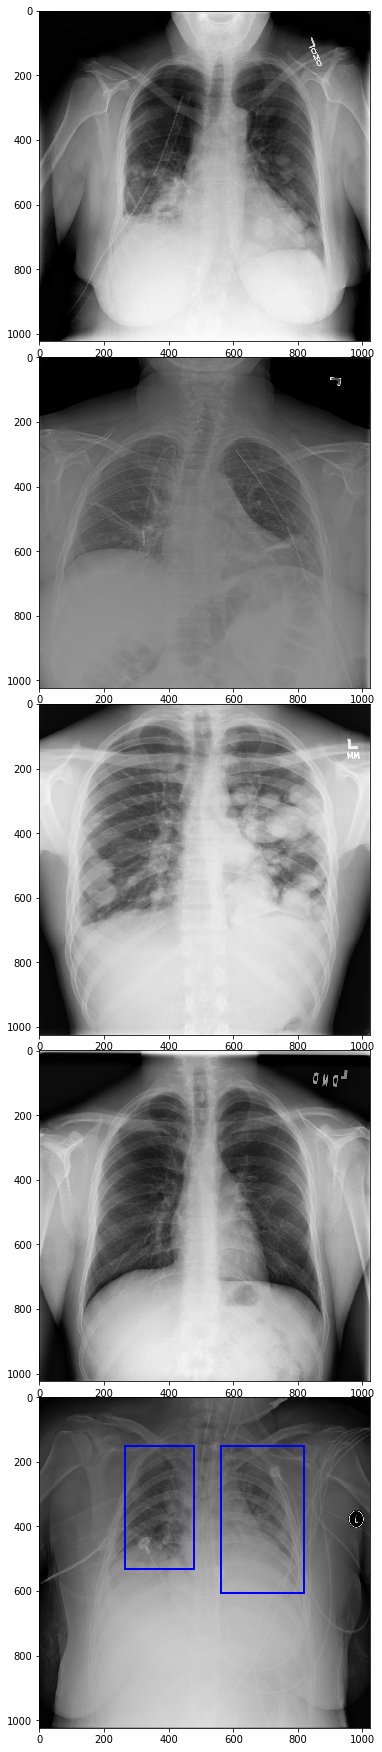

In [256]:
Drawimg_from_DF(img_test, TRAIN_PATH_RAW,train_labels )

In [259]:
img_test['class']

0    No Lung Opacity / Not Normal
1    No Lung Opacity / Not Normal
2    No Lung Opacity / Not Normal
3                          Normal
4                    Lung Opacity
Name: class, dtype: object

So having a look it does seem like images 1 and 3 have weird bubbles in their lungs, image 4 looks clean and images 2 and 5 are cloudy but only image 5 is classified as having lung opacity.

However now we have some nice functions and the data formatted let's move onto having a look at the data distributions in the headers.